<a href="https://colab.research.google.com/github/juanqwerty773/tallerDeGit/blob/main/Colabs/nb02_Derivacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> (Última Actualización: 23 de Agosto de 2025)

# **Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**)
## Laboratorio numérico

Bienvenidos al laboratorio numérico de la materia *Introducción al modelado continuo*, también conocida como *Ecuaciones de la física matemática*. En este, vamos a ver métodos numéricos para resolver distintos tipos de problemas de manera general, y su relación y aplicación a problemas específicos de la materia, de manera tal de complementar los contenidos de la cursada teórico-práctica.


# Motivación de este colab
<!-- $$\require{amsmath}$$ -->

Recordemos que estamos estudiando **sistemas dinámicos**, con reglas representadas por **ecuaciones diferenciales ordinarias (ODEs)** que describen la evolución temporal de variables continuas.

En este marco, es importante recordar:
* Nos concentraremos principalmente en **sistemas autónomos**, por lo que las variables no dependen explícitamente del tiempo y su evolución se define a partir de la ecuación $\dot{x}=dx/dt=f(x)$
* $f(x)$ es lo que llamamos un **campo vector**
* Definimos como **punto fijo ($x^{*}$)** aquel para el cual se cumple que $\dot{x}=f(x)=0$
* De esta manera, si la condición inicial es $x(0)=x^{*}$, la única evolución temporal posible sería permanecer en ese punto fijo $\forall t > 0$
* El signo del campo vector define la **dirección del flujo**:
    * Si $f(x) > 0$, entonces $\dot{x} > 0$, por lo que $x$ crece.
    * Si $f(x) < 0$, entonces $\dot{x} < 0$, por lo que $x$ decrece.
* La dirección del flujo me da indicios de la **estabilidad de un punto fijo**.
* La **estabilidad de un punto fijo** también puede estudiarse calculando la **derivada del campo vector evaluada en cada punto fijo**.
    * Dado el sistema dinámico autónomo 1D definido por $\dot{x}=dx/dt=f(x)$
    * Este sistema tiene puntos fijos $x^{*}$, que son las raíces del campo vector (donde el campo vector se hace cero) de la forma $\dot{x}=f(x)=0$.
    * Para estudiar la estabilidad de los puntos fijos, tengo que evaluar la derivada en el punto fijo de la forma $\frac{df}{dx} \Bigr\rvert_{x^{\*}} = f'(x^{*})$, donde
        * Si $f'(x^{\*}) > 0$, el punto fijo será **inestable**.
        * Si $f'(x^{\*}) < 0$, el punto fijo será **estable**.

Entonces, teniendo los puntos fijos $x^{*}$ usando los métodos vistos en la clase pasada, podríamos analizar su **estabilidad** a partir de la **derivada del campo vector evaluada en el punto fijo**. Esto motiva a que estudiemos distintos **métodos numéricos para el cálculo de la derivada** de funciones.



# Derivada numérica

La [derivada](https://en.wikipedia.org/wiki/Derivative) de una función $f(x)$ en $x=x_{0}$ se define como el límite del cociente incremental

$$
f'(x_{0}) = \lim_{h \to 0} \frac{f(x_{0}+h) - f(x_{0})}{h}
$$

Consiste básicamente en calcular la pendiente de la secante entre el punto y el punto más un paso h, y hacer tender el paso h a cero, de manera tal que en este límite tienda a la pendiente de la recta tangente en el punto.

<img align=center src=https://raw.githubusercontent.com/HBocaccio/NumLabIMC/main/Colabs/images/2.derivada.png width="400">


## Métodos para derivar una función

Existen 3 [fórmulas de diferencias finitas](https://en.wikipedia.org/wiki/Finite_difference#Forward,_backward,_and_central_differences) principales para aproximar numéricamente las derivadas.

La *fórmula de la diferencia progresiva (forward)* con un tamaño de paso $h$ es

$$
f'(x_{0}) \approx \frac{f(x_{0} + h) - f(x_{0})}{h}
$$

La *fórmula de la diferencia regresiva (backward)* con un tamaño de paso $h$ es

$$
f'(x_{0}) \approx \frac{f(x_{0}) - f(x_{0} - h)}{h}
$$

La *fórmula de la diferencia central* con un tamaño de paso $h$ es el promedio de las fórmulas de diferencia hacia delante y hacia atrás

$$
f'(x_{0}) \approx \frac{1}{2} \left( \frac{f(x_{0} + h) - f(x_{0})}{h} + \frac{f(x_{0}) - f(x_{0} - h)}{h} \right) = \frac{f(x_{0} + h) - f(x_{0} - h)}{2h}
$$

### Ejercicio 1

Escribamos una función llamada `derivar` que toma los parámetros de entrada `f`, `x0`, `method` y `h` (con valores predeterminados `method='central'` y `h=0.01`) y devuelve la fórmula de diferencia correspondiente para $f'(x_{0})$ con tamaño de paso $h$.

In [1]:
import numpy as np
np.set_printoptions(legacy='1.25')
import matplotlib.pyplot as plt
import scipy as sp

In [83]:
def derivar(f,x0,method='central',h=0.01):
  forward = (f(x0+h) - f(x0))/h
  backward = (-f(x0-h) + f(x0))/h
  if(method == 'forward'):
    return forward
  elif(method == 'backward'):
    return backward
  return (f(x0+h) - f(x0-h))/(2*h)


Probemos nuestra función con algunas funciones simples. Por ejemplo, sabemos que

$$
\left. \frac{d}{dx} \left( \cos x \right) \, \right|_{x=0} = -\sin(0) = 0
$$

y calculamos

In [7]:
derivar(np.cos, 0)

0.0

In [8]:
derivar(np.cos, 0, method='forward', h=1e-8)

0.0

Observe que nuestra función puede tomar una matriz de entradas para $x0$ y devolver las derivadas para cada valor de $x0$. Por ejemplo, podemos representar gráficamente la derivada de $\sin(x)$:

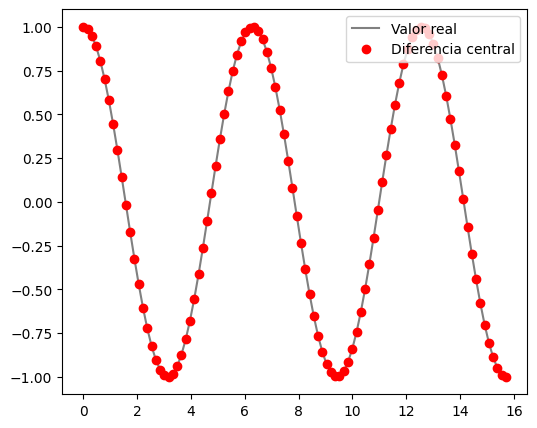

In [9]:
x = np.linspace(0,5*np.pi,100)
# Derivada estimada
dydx = derivar(np.sin,x)
# Derivada real conocida
dYdx = np.cos(x)

plt.figure(figsize=(6,5))
plt.plot(x, dYdx, 'gray', label='Valor real')
plt.plot(x, dydx, 'ro', label='Diferencia central')
plt.legend(loc='upper right')
plt.show()

Con estos métodos podemos calcular numéricamente la derivada de funciones complicadas, para los cuales el cálculo de la derivada analítica no es trivial. Veamos el siguiente ejemplo

$$
y=\left(\frac{4x^2+2x+1}{x+2e^x}\right)^x
$$

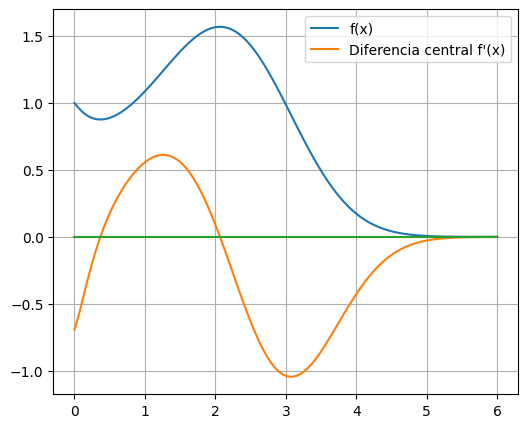

In [12]:
x = np.linspace(0, 6, 100)
f = lambda x: ((4*x**2 + 2*x + 1)/(x + 2*np.exp(x)))**x
y = f(x)
dydx = derivar(f, x)

plt.figure(figsize=(6,5))
plt.plot(x, y, label='f(x)')
plt.plot(x, dydx, label="Diferencia central f'(x)")
plt.plot(x,0*x)
plt.legend()
plt.grid(True)
plt.show()

## Error en la estimación de la derivada

### Error de truncamiento

En primer lugar, una parte del error de la estimación se debe a que estamos truncando el desarrollo de Taylor para aproximar la derivada.
Del [Teorema de Taylor](https://en.wikipedia.org/wiki/Taylor%27s_theorem), podemos definir

$$
f(x) = f(x_{0}) + f'(x_{0})(x - x_{0}) + \frac{f''(x_{0})}{2}(x-x_{0})^2 + \frac{f'''(x_{0})}{6}(x-x_{0})^{3} + \cdots
$$

Entonces, evaluando en $x=x_{0}+h$, podemos encontrar el **error de truncamiento del método de la diferencia progresiva** asociado a los términos de orden superior que estamos despreciando al aproximar por un polinomio de Taylor de grado 1. De esta manera, sabemos que esta componente del error de tener una cota definida por la expresión

$$
\left| \, \frac{f(x_{0}+h) - f(x_{0})}{h} - f'(x_{0}) \, \right| \leq \frac{hK_2}{2}
$$

donde $\left| \, f''(x) \, \right| \leq K_2$ para todo $x \in [x_{0},x_{0}+h]$.

De manera análoga, obtenemos que esta misma fórmula se aplica al **error de truncamiento del método de la diferencia regresiva**. Esto se debe a que en ambos casos necesitamos evaluar la función en 2 puntos y que los métodos son casos particulares de una forma más general pero para $h > 0$ y $h < 0$, respectivamente.

Para el cálculo del **error de truncamiento del método de la diferencia central**, tenemos una expresión distinta, debido a que estamos evaluando la función en 3 puntos. De esta manera, el error debido al truncamiento al aproximar es menor (para h chico).


$$
\left| \frac{f(x_{0}+h) - f(x_{0}-h)}{2h} - f'(x_{0}) \right| \leq \frac{h^2K_3}{6}
$$

donde $|f'''(x)| \leq K_3$ para todo $x \in [x_{0}-h,x_{0}+h]$.

Esto se debe a que tenemos que truncar a polinomios de Taylor de grado 2, debido a que cuando evaluamos en $x = x_{0} + h$ y en $x = x_{0} - h$ el término cuadrático se cancela, como se muestra a continuación

\begin{align}
f(x_{0}+h) &= f(x_{0}) + f'(x_{0})h + \frac{f''(x_{0})}{2}h^2 + \frac{f'''(c_1)}{6}h^{3} \\\
f(x_{0}-h) &= f(x_{0}) - f'(x_{0})h + \frac{f''(x_{0})}{2}h^2 - \frac{f'''(c_2)}{6}h^{3} \\\
f(x_{0}+h) - f(x_{0}-h) &= 2 f'(x_{0})h + \frac{f'''(c_1)}{6}h^{3} + \frac{f'''(c_2)}{6}h^{3} \\\
\frac{f(x_{0}+h) - f(x_{0}-h)}{2h} - f'(x_{0}) &= \frac{f'''(c_1) + f'''(c_2)}{12}h^{2}
\end{align}

Donde consideramos que $f'''(x)$ es continua (por suposición) y $(f'''(c_1) + f'''(c_2))/2$ está entre $f'''(c_1)$ y $f'''(c_2)$ y, por lo tanto, existe algún $c$ entre $c_1$ y $c_2$, por la Teorema del valor intermedio, tal que

$$
f'''(c) = \frac{f'''(c_1) + f'''(c_2)}{2}
$$

Entonces elegimos $K_3$ tal que $\left| \, f'''(x) \, \right| \leq K_3$ para todo $x \in [x_{0}-h,x_{0}+h]$ y obtenemos la expresión del error de más arriba.


### Error de redondeo

Si consideramos sólo el error de truncamiento, pareciera que siempre me conviene usar valores de $h$ muy chicos. Esta afirmación es en parte válida, pero se debe también tenerse en consideración el error de redondeo de la máquina.

El error de redondeo $e$ en la estimación de los valores de la función evaluada será

$$f(x) = \hat{f}(x) + e(x)$$

Por lo que para el método de la diferencia progresiva me queda la expresión

$$\frac{f(x_{0}+h) - f(x_{0})}{h} - f'(x_{0})=\frac{\hat{f}(x_{0}+h) - \hat{f}(x_{0})}{h} - f'(x_{0})+\frac{e(x_{0}+h) - e(x_{0})}{h}$$

Y si suponemos que los errores de redondeo están acotados por un número $𝜀 > 0$, entonces voy a estar cometiendo un error que va como $𝜀/h$. Y procediendo análogamente, se puede mostrar que el error de redondeo para los otros métodos son también proporcionales a $𝜀/h$.

Esto quiere decir que cuánto más chico es el $h$ mayor es el error de redondeo que voy a cometer en la estimación. De esta manera, el error total, que estará compuesto tanto por el error de truncamiento como por el error de redondeo, va a tener una dependencia con $h$ en la que se requiera un balance en su valor. El $h$ debe ser chico para reducir el error de truncamiento, pero tampoco tanto como para tener un error de redondeo alto.

### Ejercicio 2

Se la función $f(x)=e^x$, calcule la derivada numérica con la función `derivar` del Ejercicio 1 para los 3 métodos de diferencias finitas, en $x_{0}=5$, para valores de $h$ entre 1e-7 y 1e-2 rellenando con un paso de 5e-7. Calcule el valor absoluto del error cometido en el cálculo de la derivada respecto de la real y grafique en función de $h$, con ambos ejes en escala logarítmica. Qué observa en el comportamiento del error?

In [84]:
# # # Definimos algunas variables y funciones útiles como punto de partida para el ejercicio
x0 = 5
f = lambda x: np.exp(x)
fprima = lambda x: np.exp(x)
hs = np.arange(1e-7, 1e-2, 5e-7)

In [87]:
derivar(f,x0, 0.1)

148.41563266759294

In [88]:
derivadas_b =[derivar(f,x0,'backward', h) for h in hs]
derivadas_c =[derivar(f,x0, 'central', h) for h in hs]
derivadas_f =[derivar(f,x0,'forward', h) for h in hs]

derivadas_b = np.array(derivadas_b)
derivadas_c = np.array(derivadas_c)
derivadas_f = np.array(derivadas_f)
ff = fprima(x0)
result_b = np.abs(fprima(x0) - derivadas_b)
result_c = np.abs(fprima(x0) - derivadas_c)
result_f = np.abs(fprima(x0) - derivadas_f)


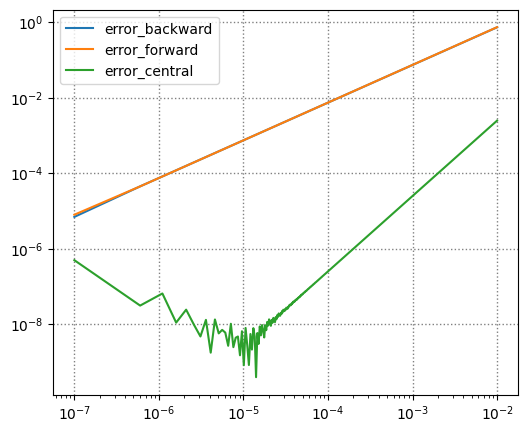

In [89]:
plt.figure(figsize=(6,5))
plt.loglog(hs, result_b, label='error_backward')
plt.loglog(hs, result_f, label='error_forward')
plt.loglog(hs, result_c, label='error_central')
#plt.plot(x, dydx, label="Diferencia central f'(x)")
#plt.plot(x,0*x)
plt.legend()
plt.grid(True, color='gray', linestyle=':', linewidth=1)
plt.show()

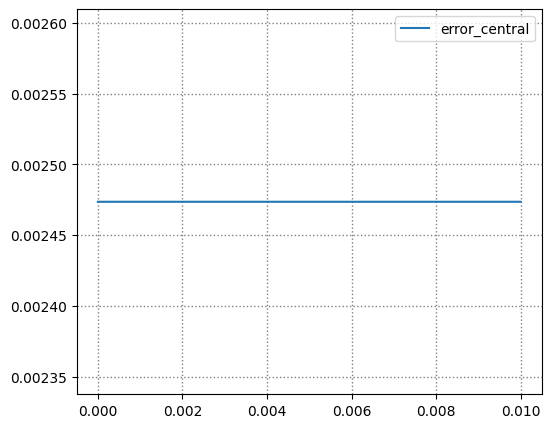

In [66]:
plt.figure(figsize=(6,5))
plt.plot(hs, result_c, label='error_central')
#plt.yticks(fontsize=0.1)  # Tamaño de las marcas del eje Y
plt.legend()
plt.grid(True, color='gray', linestyle=':', linewidth=1)
plt.show()

# Estabilidad de puntos fijos


Supongamos que tenemos el sistema dinámico

$\dot{x}=f(x)=x-x^{3}$

In [33]:
# # # Definimos la función campovector para el sistema dinámico
def campovector(x):
    return x-x**3

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2464839299.py:8: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$f(x), \dot{x}$', fontsize=18)


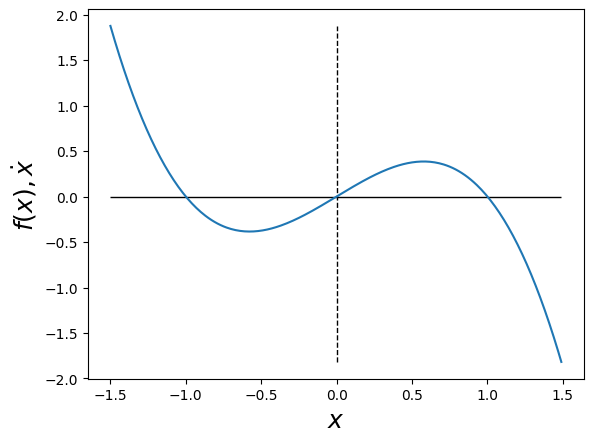

In [34]:
# # # Definimos el dominio, evaluamos el campo vector, y graficamos
x = np.arange(-1.5, 1.5, 0.01)
y = campovector(x)
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x), \dot{x}$', fontsize=18)
plt.show()

Buscamos las raíces del campo vector. Para eso definimos una función de Python que haga una exploración para N inicializaciones

In [35]:
def root_finder(f, x, N=20, round=2, seed=0):
    if seed is not None:
        np.random.seed(seed)
    condiciones_iniciales = np.random.choice(x, size=N)
    soluciones = []
    for c in condiciones_iniciales:
        try:
            sol = sp.optimize.newton(f, fprime=None, x0=c, tol=0.0001, maxiter=100, disp=False)
            soluciones.append(sol)
        except RuntimeError:
            pass
    return np.unique(np.array(soluciones).round(round))

In [36]:
puntosfijos = root_finder(campovector, x)

In [37]:
puntosfijos

array([-1.,  0.,  1.])

Calculamos las pendientes en cada punto fijo usando la función `derivar` del ejercicio 1

In [38]:
pendientes = []
for x0 in puntosfijos:
    pendientes.append(derivar(f=campovector, x0=x0))

In [39]:
pendientes

[-2.0001000000000047, 0.9999000000000001, -2.0001000000000047]

Definamos una variable `estabilidad` que se fije en el signo de la derivada y a partir de este tome valor 1 (0) cuando el punto fijo sea estable (inestable), para cada punto fijo

In [40]:
estabilidad = []
for p in pendientes:
    estabilidad.append(int(p < 0))

In [41]:
estabilidad

[1, 0, 1]

Calculamos las ordenadas de las rectas tangentes al campo vector en los puntos fijos para estudiar el flujo y graficamos

In [42]:
ordenadas = -np.array(pendientes)*np.array(puntosfijos)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2164214422.py:7: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$f(x), \dot{x}$', fontsize=18)


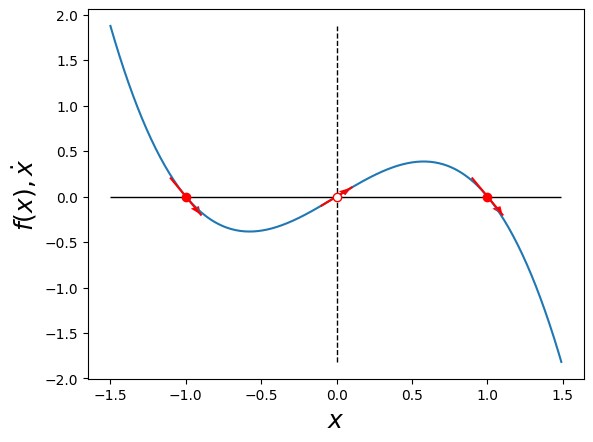

In [43]:
markerfcolors = ['w', 'r']
markerecolors = ['r', 'r']
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x), \dot{x}$', fontsize=18)
for p in np.arange(len(puntosfijos)):
    epsilon = 0.1
    n = 10
    x_tmp = np.linspace(puntosfijos[p]-epsilon, puntosfijos[p]+epsilon, n)
    y_tmp = pendientes[p]*x_tmp+ordenadas[p]
    plt.plot(x_tmp, y_tmp, 'r')
    plt.arrow(x_tmp[-2], y_tmp[-2], x_tmp[-1]-x_tmp[-2], y_tmp[-1]-y_tmp[-2],
              shape='full', color='r', lw=0, length_includes_head=True, head_width=.06)
    plt.plot(puntosfijos[p], 0, marker='o',
             markerfacecolor=markerfcolors[estabilidad[p]], markeredgecolor=markerecolors[estabilidad[p]])
plt.show()

<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-38233218.py:22: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$f(x), \dot{x}$', fontsize=18)


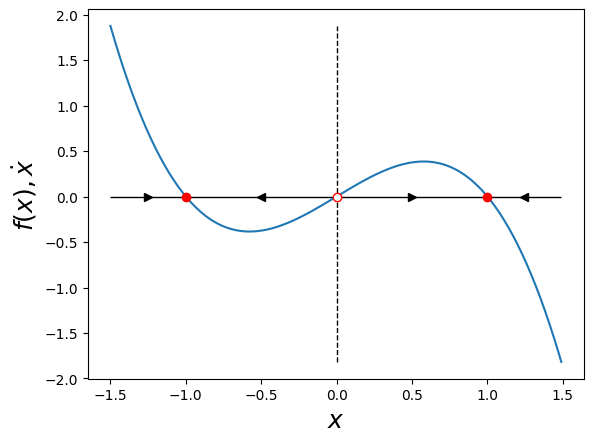

In [44]:
markerfcolors = ['w', 'r']
markerecolors = ['r', 'r']
xmarkerstyle = ['<', '>']
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)

for p in np.arange(len(puntosfijos)):
    puntosfijos_sorted = np.sort(puntosfijos)
    if puntosfijos_sorted[p] == puntosfijos_sorted.min():
        x_markers_tmp = [x[0]+(puntosfijos_sorted[p]-x[0])/2]
    elif puntosfijos_sorted[p] == puntosfijos_sorted.max():
        x_markers_tmp = [x[-1]-(x[-1]-puntosfijos[p])/2]
    else:
        x_markers_tmp = [puntosfijos_sorted[p]-(puntosfijos_sorted[p]-puntosfijos_sorted[p-1])/2,
                        puntosfijos_sorted[p]+(puntosfijos_sorted[p+1]-puntosfijos_sorted[p])/2]
    plt.plot(puntosfijos[p], 0, marker='o',
             markerfacecolor=markerfcolors[estabilidad[p]], markeredgecolor=markerecolors[estabilidad[p]])
    for i in np.arange(len(x_markers_tmp)):
        plt.plot(x_markers_tmp[i], 0, c='k', marker=xmarkerstyle[int(campovector(x_markers_tmp[i]) > 0)])
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x), \dot{x}$', fontsize=18)
plt.show()

## Bifurcación de Pitchfork

Estudiemos ahora el sistema dinámico asociado a una bifurcación de Pitchfork supercrítica, definido por la ecuación

$\dot{x}=f(x)=rx-x^{3}$

In [45]:
# # # Defino la función campovector para el sistema dinámico, incluyendo el parámetro r
def campovector(x, r):
    return r*x-x**3

Primero hago una inspección gráfica de $x^{3}$ y $rx$ para ver posibles intersecciones para distintos valores de $r$

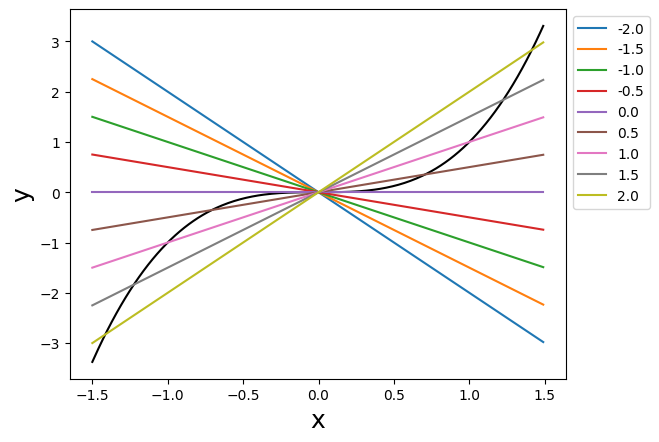

In [51]:
x = np.arange(-1.5, 1.5, 0.01)
plt.plot(x, x**3, 'k')
rs = np.arange(-2, 2.1, 0.5)
for r in rs:
    plt.plot(x, r*x, label=str(r))
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Ahora grafico el campo vector

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-865417514.py:8: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\dot{x}$', fontsize=18)


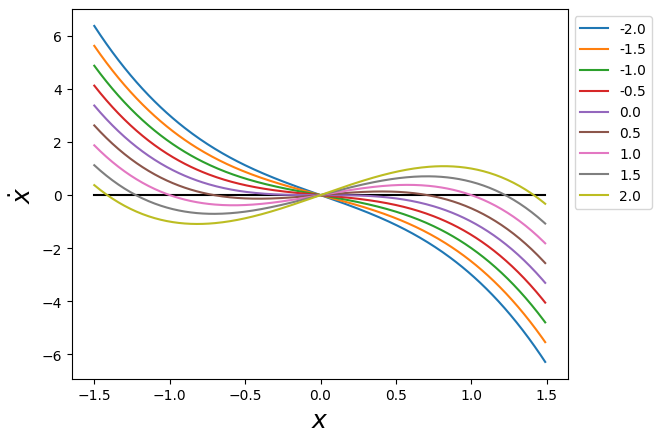

In [53]:
x = np.arange(-1.5, 1.5, 0.01)
rs = np.arange(-2, 2.1, 0.5)
plt.plot(x, x*0, 'k')
for r in rs:
    y = campovector(x, r)
    plt.plot(x, y, label=str(r))
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$\dot{x}$', fontsize=18)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

También podemos hacerun gráfico interactivo para ver la forma del campo vector para distintos valores del parámetro $r$. Existen varias formas de hacer esto, vamos a ver una de ejemplo, pero pueden buscar un montón de alternativas y variables de visualización.

In [54]:
from ipywidgets import interact, FloatSlider

@interact(r=FloatSlider(min=-2, max=2, step=0.1, value=0))
def plot_campovector_interactive(r):
    x = np.arange(-1.5, 1.5, 0.01)
    y = campovector(x, r)
    plt.figure(figsize=(6,5))
    plt.plot(x, y, label=f'r = {r}')
    plt.xlabel('$x$', fontsize=18)
    plt.ylabel(r'$\dot{x}$', fontsize=18)
    plt.ylim(-6, 6)
    plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
    plt.legend()
    # plt.grid(True)
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='r', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

A partir de estos gráficos, que puede suponer a priori de los puntos fijos?

Ahora vamos a definir un conjunto de valores de $r$. Para cada $r$ vamos a definir un campo vector que sea el del sistema pero para ese valor de parámetro. Vamos a buscar de manera automatizada los puntos fijos, a definir su estabilidad, y a graficar cada punto fijo en función del parámetro para ver el diagrama de bifurcaciones

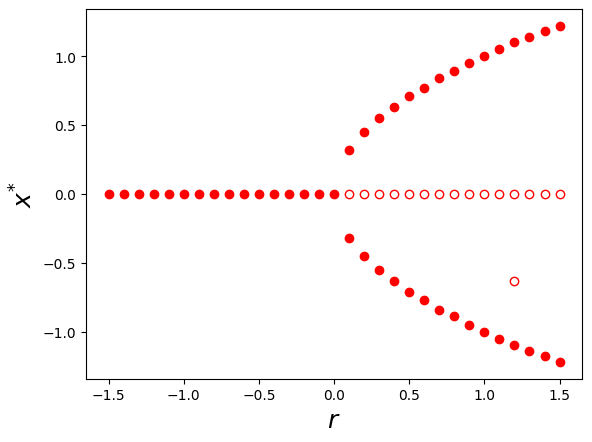

In [55]:
markerfcolors = ['w', 'r']
markerecolors = ['r', 'r']
x = np.arange(-1.5, 1.5, 0.01)
N = 20
rs = np.arange(-1.5, 1.6, 0.1)
for r in rs:
    def campovector_r(x):
        return campovector(x, r)
    puntosfijos = root_finder(campovector_r, x, N=N)
    pendientes = []
    for x0 in puntosfijos:
        p = derivar(f=campovector_r, x0=x0)
        pendientes.append(p)
        plt.plot(r, x0, 'o', markerfacecolor=markerfcolors[int(p < 0)], markeredgecolor=markerecolors[int(p < 0)])
plt.xlabel('$r$', fontsize=18)
plt.ylabel('$x^{*}$', fontsize=18)
plt.show()

*Observación: En el gráfico anterior se observa un punto que llama la atención. Es un punto fijo o un artefacto? A qué se puede deber? Se podría limpiar este artefacto en alguna parte del proceso?*

## Ejercicio 3

Escriban un bloque de código que podría concatenarse a la función `root_finder`, o una nueva función `root_finder_clean` que sea una modificación de la anterior, que evalúe si las soluciones encontradas son realmente soluciones, y se quede con aquellas que sí lo son. Para su evaluación puede tener ciertas consideraciones sobre tolerancia del criterio, redondeo de los valores numéricos evaluados, etc.

In [ ]:
def root_finder_clean(campo,x):
  sols = root_finder(campo,x)
  eval = campo(sols)
  for i in eval:
    if (eval[i] - 0).round(2):




def root_finder(f, x, N=20, round=2, seed=0):
    if seed is not None:
        np.random.seed(seed)
    condiciones_iniciales = np.random.choice(x, size=N)
    soluciones = []
    for c in condiciones_iniciales:
        try:
            sol = sp.optimize.newton(f, fprime=None, x0=c, tol=0.0001, maxiter=100, disp=False)
            soluciones.append(sol)
        except RuntimeError:
            pass
    return np.unique(np.array(soluciones).round(round))

## Ejercicio 4

Estudiemos ahora el sistema dinámico asociado a una bifurcación de Pitchfork subcrítica, definido por la ecuación

$\dot{x}=f(x)=rx+x^{3}$

In [ ]:
# # # COMPLETAR

# Derivada numérica aplicada a datos reales

Hasta ahora, hablamos de derivadas numéricas de funciones, en los que definimos el $h$ con cualquier valor arbitrario que quisieramos. Esto era posible porque teníamos la expresión de la función. Qué pasa cuando tengo datos? Qué formato tienen los datos? Conozco esa relación entre variables?



## Uso de paquetes de Python

Los paquetes [NumPy](https://numpy.org/) y [SciPy](https://scipy.org/) tienen algunas funciones que nos pueden ayudar a calcular derivadas primeras. Por ejemplo, Scipy tiene la función `scipy.misc.derivative` utilizando la fórmula de diferencia central, pero tiene problemas, se aplica a funciones, y será despreciado en próximas versiones (recomiendan otros paquetes, ver documentación). Numpy tiene la función `numpy.diff` que sólo me calcula la diferencia entre elementos de un array, por lo que devuelve un array de tamaño n-1; y también la función `numpy.gradient` que usa la fórmula de diferencia central pero como variable de entrada pide un array para "y", y también se le puede pasar un array para "x" (ver documentación), lo que la hace ideal para trabajar con datos.

In [ ]:
x = np.array([0.0, 0.1, 0.2, 0.3, 0.4])
y = np.array([0.0, 0.0998, 0.1987, 0.2955, 0.3894])

derivada = np.gradient(y, x)
for i in range(0, len(x)):
    print("La derivada en x = %f es %f" % (x[i], derivada[i]))

In [ ]:
delta = 0.01
fig = plt.figure(figsize=(6,6))
plt.plot(x, y, 'ko', label='datos')
for i in range(0, len(x)):
    ord = y[i]-np.array(derivada[i])*np.array(x[i])
    plt.plot([x[i]-delta, x[i]+delta], [derivada[i]*(x[i]-delta)+ord, derivada[i]*(x[i]+delta)+ord], 'r', label='derivada')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
handles, labels = plt.gca().get_legend_handles_labels()
_, idx = np.unique(np.array(labels), return_index=True)
plt.legend(np.array(handles)[idx], np.array(labels)[np.sort(idx)], loc='upper left', fontsize=12)
plt.show()

## Ejemplo: datos de peatones

Vamos a cargar una base de datos de un repositorio público, con datos de [tránsito de peatones](https://archive.ics.uci.edu/dataset/536/pedestrian+in+traffic+dataset). Nos vamos a quedar sólo con las posiciones y vamos a calcular numéricamente las derivadas, como estimación de la velocidad. De esta manera, podemos observar algunas características estadísticas de las estimaciones obtenidas numéricamente de datos.

1. Explorar el hipervínculo del repositirio donde se dá indicaciones de como cargar el dataset (tiene un paquete asociado).
2. Descargar los datos y exportar las posiciones en "x" y en "y" únicamente para el sujeto indicado por la variable identificatoria "oid" igual a 19339.
3. Graficar las posiciones. Pensar cómo esperaría que sean las derivadas de cada una de las variables.
4. Calcular las derivadas de las posiciones "x" e "y" con la función `numpy.gradient`.
5. Hacer un subplot en el que las posiciones compartan eje x con las derivadas de las posiciones. Observar cómo se comportan las derivadas y comparar con lo esperado.

In [ ]:
import pandas as pd

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
pedestrians_in_traffic = fetch_ucirepo(id=536)
# data (as pandas dataframes)
X = pedestrians_in_traffic.data.features
y = pedestrians_in_traffic.data.targets
# metadata
print(pedestrians_in_traffic.metadata)
# variable information
print(pedestrians_in_traffic.variables)

In [ ]:
np.unique(X['oid'].values)

In [ ]:
X.groupby('oid')[['x', 'y']].count()

In [ ]:
pos_x = X[X['oid'] == 19339]['x'].ravel()
pos_y = X[X['oid'] == 19339]['y'].ravel()

In [ ]:
times = np.arange(0, len(pos_x))

In [ ]:
plt.plot(pos_x, pos_y)

In [ ]:
plt.plot(times, pos_x)

In [ ]:
plt.plot(times, pos_y)

In [ ]:
derivada_x = np.gradient(pos_x)
derivada_y = np.gradient(pos_y)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,8), sharex=True)
axs[0,0].plot(times, pos_x, c='k', lw=2, label='x')
axs[0,0].legend(fontsize=16)
axs[0,1].plot(times, pos_y, c='k', lw=2, label='y')
axs[0,1].legend(fontsize=16)
axs[1,0].plot(times, derivada_x, c='k', lw=2, label='derivada x')
axs[1,0].legend(fontsize=16)
axs[1,1].plot(times, derivada_y, c='k', lw=2, label='derivada y')
axs[1,1].legend(fontsize=16)
plt.show()

Cómo se comportan las derivadas? Esperaba fluctuaciones en ambas derivadas al ver los valores de las posiciones?

Hay un tema de ruido y de robustez de la estimación que necesitamos resolver y vamos a profundizar más adelante...

